In [2]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("amazon_reviews_us_Grocery_v1_00.tsv", sep='\t', quoting=3)
df = df[["product_id", "star_rating", "review_body"]]
df

product_id  star_rating  \
0        B000SAQCWC            5   
1        B00509LVIQ            5   
2        B00KHXESLC            5   
3        B000F8JIIC            5   
4        B004ZWR9RQ            5   
...             ...          ...   
2402453  B00004TBB0            4   
2402454  B00000K1X9            5   
2402455  B00000K1X9            5   
2402456  B00000K1X9            5   
2402457  B00000K1X9            5   

                                               review_body  
0        As a family allergic to wheat, dairy, eggs, nu...  
1        My favorite nut.  Creamy, crunchy, salty, and ...  
2        This green tea tastes so good! My girlfriend l...  
3        I love Melissa's brand but this is a great sec...  
4                                                     good  
...                                                    ...  
2402453  The Amor Belhom Duo are likely the only musici...  
2402454  Being  a  Breyer  collecter  almost  all  of  ...  
2402455  This model is beautiful.  each model is hand p...  
2402456  As a person who has collected Breyers all my l...  
2402457  This Breyer horse is wonderful. She is beautif...  

[2402458 rows x 3 columns]

In [4]:
data = df.dropna()
data = data.query('star_rating < 4', engine='python')
data = data.sample(100000)
data

product_id  star_rating  \
1323586  B009EQI2SI            2   
1540930  B004N5FR06            1   
2125891  B004JRMG98            3   
1708063  B000H23UEO            1   
1275958  B00F9XU5O4            3   
...             ...          ...   
284081   B00C0TDKVU            2   
847174   B0063T0ALQ            3   
77574    B00SUE81HC            1   
14758    B00VFYPG1S            2   
2064487  B000EVOSE4            3   

                                               review_body  
1323586  I had hoped for more from this soup. It had a ...  
1540930  DO NOT BUY!!!!! the candy was completely melte...  
2125891  This sauce was too spicy--it tasted as if the ...  
1708063  this is probably an ok product.  It turns out ...  
1275958  Caza trail is on par with all other K-cup brea...  
...                                                    ...  
284081   to me it has an odd taste.  I have gone back t...  
847174   Made sausages a few time times.. followed home...  
77574    TERRIBLE!!! Half of the pods are not even for ...  
14758    UPDATE: I loved the tea so much that I ordered...  
2064487  I bought this thinking it was going to be a lo...  

[100000 rows x 3 columns]

In [5]:
#data['review_body'] = data['review_body'].map(lambda x: re.sub('[,\.!?]', '', x))
#data['review_body'] = data['review_body'].map(lambda x: x.lower())
data = data["review_body"]
data

1323586    I had hoped for more from this soup. It had a ...
1540930    DO NOT BUY!!!!! the candy was completely melte...
2125891    This sauce was too spicy--it tasted as if the ...
1708063    this is probably an ok product.  It turns out ...
1275958    Caza trail is on par with all other K-cup brea...
                                 ...                        
284081     to me it has an odd taste.  I have gone back t...
847174     Made sausages a few time times.. followed home...
77574      TERRIBLE!!! Half of the pods are not even for ...
14758      UPDATE: I loved the tea so much that I ordered...
2064487    I bought this thinking it was going to be a lo...
Name: review_body, Length: 100000, dtype: object

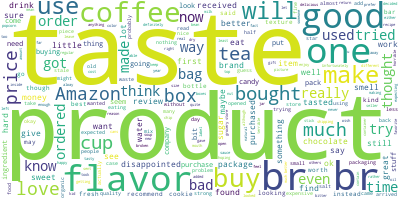

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['br','[', ',', '\\', '.', '!', '?', ']', '<', '>', '$', '£', '/', '*', '(', ')', '%', '^', '&', '-', '_', '=', '+', '|', '#','~',';',':','...',"''",'//','\\\\',"n't","'ve","'m","'s","'"])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(str(sentence)))
        
def remove_stopwords(texts):
    return [[(te,ta) for (te,ta) in doc if (te.replace("_NEG","") not in stop_words)] for doc in texts]

data_filtered = data
data_words = list(sent_to_words(data_filtered))
# remove stop words
#data_words = remove_stopwords(data_words)
pprint.pprint(data_words[:5])
#np.array(data_words[0], dtype=object).shape

[['I',
  'had',
  'hoped',
  'for',
  'more',
  'from',
  'this',
  'soup',
  '.',
  'It',
  'had',
  'a',
  'flat',
  'cumin',
  'spice',
  'flavor',
  ',',
  'was',
  'too',
  'salty',
  'and',
  'was',
  'pasty',
  '.',
  'No',
  'more',
  'soup',
  'for',
  'me',
  '.'],
 ['DO',
  'NOT',
  'BUY',
  '!',
  '!',
  '!',
  '!',
  '!',
  'the',
  'candy',
  'was',
  'completely',
  'melted',
  'but',
  'there',
  'was',
  'no',
  'way',
  'of',
  'knowing',
  'that',
  'until',
  'you',
  'open',
  'the',
  'package',
  '.',
  'Since',
  'you',
  'can',
  'not',
  'return',
  'a',
  'package',
  'that',
  'has',
  'been',
  'open',
  ',',
  'I',
  'was',
  'stuck',
  'with',
  'to',
  'blobs',
  'of',
  'chocolate',
  'and',
  'peanut',
  'butter',
  '.'],
 ['This',
  'sauce',
  'was',
  'too',
  'spicy',
  '--',
  'it',
  'tasted',
  'as',
  'if',
  'the',
  'sauce',
  'was',
  'relying',
  'on',
  'its',
  'other',
  'spices',
  'to',
  'do',
  'the',
  'work',
  'rather',
  'than',
 

In [8]:
data_words = [[word.lower() for word in data_point] for data_point in data_words]
data_words

[['i',
  'had',
  'hoped',
  'for',
  'more',
  'from',
  'this',
  'soup',
  '.',
  'it',
  'had',
  'a',
  'flat',
  'cumin',
  'spice',
  'flavor',
  ',',
  'was',
  'too',
  'salty',
  'and',
  'was',
  'pasty',
  '.',
  'no',
  'more',
  'soup',
  'for',
  'me',
  '.'],
 ['do',
  'not',
  'buy',
  '!',
  '!',
  '!',
  '!',
  '!',
  'the',
  'candy',
  'was',
  'completely',
  'melted',
  'but',
  'there',
  'was',
  'no',
  'way',
  'of',
  'knowing',
  'that',
  'until',
  'you',
  'open',
  'the',
  'package',
  '.',
  'since',
  'you',
  'can',
  'not',
  'return',
  'a',
  'package',
  'that',
  'has',
  'been',
  'open',
  ',',
  'i',
  'was',
  'stuck',
  'with',
  'to',
  'blobs',
  'of',
  'chocolate',
  'and',
  'peanut',
  'butter',
  '.'],
 ['this',
  'sauce',
  'was',
  'too',
  'spicy',
  '--',
  'it',
  'tasted',
  'as',
  'if',
  'the',
  'sauce',
  'was',
  'relying',
  'on',
  'its',
  'other',
  'spices',
  'to',
  'do',
  'the',
  'work',
  'rather',
  'than',
 

In [9]:
import nltk.sentiment.util
tokens = list(map(nltk.word_tokenize, data))
negated_tokens = list(map(nltk.sentiment.util.mark_negation, tokens))
data = negated_tokens

In [13]:
#print(data_words)
def tag(texts):
    #tokens = list(map(nltk.word_tokenize, texts))
    tagged = [nltk.pos_tag(text, tagset='universal') for text in texts]
    negated_tokens = list(map(nltk.sentiment.util.mark_negation, texts))
    negated_tagged = [[(negated_tokens[i][j], tagged[i][j][1]) for j in range(len(texts[i]))] for i in range(len(texts))]
    return negated_tagged
negated_tagged = tag(data_words)
negated_tagged

[[('i', 'NOUN'),
  ('had', 'VERB'),
  ('hoped', 'VERB'),
  ('for', 'ADP'),
  ('more', 'ADJ'),
  ('from', 'ADP'),
  ('this', 'DET'),
  ('soup', 'NOUN'),
  ('.', '.'),
  ('it', 'PRON'),
  ('had', 'VERB'),
  ('a', 'DET'),
  ('flat', 'ADJ'),
  ('cumin', 'NOUN'),
  ('spice', 'NOUN'),
  ('flavor', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('too', 'ADV'),
  ('salty', 'ADJ'),
  ('and', 'CONJ'),
  ('was', 'VERB'),
  ('pasty', 'VERB'),
  ('.', '.'),
  ('no', 'DET'),
  ('more_NEG', 'ADV'),
  ('soup_NEG', 'NOUN'),
  ('for_NEG', 'ADP'),
  ('me_NEG', 'PRON'),
  ('.', '.')],
 [('do', 'VERB'),
  ('not', 'ADV'),
  ('buy_NEG', 'VERB'),
  ('!', '.'),
  ('!', '.'),
  ('!', '.'),
  ('!', '.'),
  ('!', '.'),
  ('the', 'DET'),
  ('candy', 'NOUN'),
  ('was', 'VERB'),
  ('completely', 'ADV'),
  ('melted', 'VERB'),
  ('but', 'CONJ'),
  ('there', 'DET'),
  ('was', 'VERB'),
  ('no', 'DET'),
  ('way_NEG', 'NOUN'),
  ('of_NEG', 'ADP'),
  ('knowing_NEG', 'VERB'),
  ('that_NEG', 'ADP'),
  ('until_NEG', 'ADP'),
  ('

In [14]:
data_words = remove_stopwords(negated_tagged)
data_words

[[('hoped', 'VERB'),
  ('soup', 'NOUN'),
  ('flat', 'ADJ'),
  ('cumin', 'NOUN'),
  ('spice', 'NOUN'),
  ('flavor', 'NOUN'),
  ('salty', 'ADJ'),
  ('pasty', 'VERB'),
  ('soup_NEG', 'NOUN')],
 [('buy_NEG', 'VERB'),
  ('candy', 'NOUN'),
  ('completely', 'ADV'),
  ('melted', 'VERB'),
  ('way_NEG', 'NOUN'),
  ('knowing_NEG', 'VERB'),
  ('open_NEG', 'VERB'),
  ('package_NEG', 'NOUN'),
  ('since', 'ADP'),
  ('return_NEG', 'VERB'),
  ('package_NEG', 'NOUN'),
  ('open_NEG', 'ADJ'),
  ('stuck_NEG', 'VERB'),
  ('blobs_NEG', 'NOUN'),
  ('chocolate_NEG', 'NOUN'),
  ('peanut_NEG', 'NOUN'),
  ('butter_NEG', 'NOUN')],
 [('sauce', 'NOUN'),
  ('spicy', 'ADJ'),
  ('--', '.'),
  ('tasted', 'VERB'),
  ('sauce', 'NOUN'),
  ('relying', 'VERB'),
  ('spices', 'NOUN'),
  ('work', 'NOUN'),
  ('rather', 'ADV'),
  ('giving', 'VERB'),
  ('enough', 'ADJ'),
  ('jalapeno', 'ADJ'),
  ('flavor', 'NOUN'),
  ('okay', 'ADJ'),
  ('sauce', 'NOUN'),
  ('--', '.'),
  ('nothing', 'NOUN'),
  ('would_NEG', 'VERB'),
  ('midnight_N

In [15]:
#gets adjectives

def get_adjectives(tagged):
    review_a = [word for (word, tag) in tagged if (tag == 'ADJ')]# or tag == 'ADV' or tag == 'NOUN' or tag == 'VERB')]
    return review_a

data_words = list(map(lambda x: get_adjectives(x), data_words))

'''
for i in range(len(data_words)):
    data_words[i] = [word for (word,tag) in data_words[i]]
'''
data_words


[['flat', 'salty'],
 ['open_NEG'],
 ['spicy', 'enough', 'jalapeno', 'okay'],
 ['ok'],
 ['k-cup', 'brewed'],
 ['first', 'lemon', 'second', 'sun-brewed', 'local', 'knock-off'],
 ['general', 'whole'],
 ['smaller', 'sell-by-date', 'old'],
 ['chemical'],
 ['fast'],
 ['good', 'daily', 'organic', 'good_NEG'],
 ['good_NEG', 'horrible', 'lousy', 'many'],
 ['small', '2-3'],
 ['germany', 'many', 'undrinkable', 'espresso', 'drip_NEG'],
 ['special_NEG'],
 ['many_NEG'],
 ['great', 'weak'],
 ['several_NEG', 'fresh', 'pleased'],
 ['fine'],
 ['big', 'small'],
 ['regular', 'much_NEG'],
 ['red', 'origonal', 'nasty'],
 ['good'],
 ['black', 'red', 'white'],
 ['okay',
  'firm',
  'boiling',
  'first',
  'great_NEG',
  'firm',
  'second',
  'normal',
  'little',
  'next'],
 ['stainless', 'little_NEG', 'enough_NEG', 'big_NEG', 'enough_NEG'],
 ['great_NEG', 'good_NEG', 'good_NEG', 'good_NEG'],
 ['great_NEG', 'last_NEG', 'big_NEG'],
 ['free',
  'glutamic',
  'great',
  'many',
  'reproductive',
  'better',
  'a

In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
pprint.pprint(corpus[:5])

[[(0, 1), (1, 1)],
 [(2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1)],
 [(8, 1), (9, 1)]]


In [17]:
# number of topics
num_topics = 15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       minimum_probability=0.1,
                                       workers=3,
                                       passes=2)
# Print the Keyword in the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.101*"hard" + 0.091*"much" + 0.058*"stale" + 0.031*"okay" + '
  '0.031*"delicious" + 0.029*"nasty" + 0.021*"old" + 0.017*"little" + '
  '0.015*"long" + 0.014*"disappointed"'),
 (1,
  '0.036*"awful" + 0.033*"white" + 0.030*"high" + 0.027*"low" + 0.024*"open" + '
  '0.022*"green" + 0.018*"natural" + 0.018*"able_NEG" + 0.013*"excellent" + '
  '0.013*"light"'),
 (2,
  '0.077*"small" + 0.059*"much_NEG" + 0.045*"strong" + 0.030*"artificial" + '
  '0.030*"several" + 0.029*"large" + 0.023*"great_NEG" + 0.021*"smaller" + '
  '0.019*"worth_NEG" + 0.014*"larger"'),
 (3,
  '0.082*"old" + 0.081*"different" + 0.050*"big" + 0.035*"best" + 0.025*"last" '
  '+ 0.023*"nice" + 0.017*"full" + 0.016*"little" + 0.013*"disappointed" + '
  '0.013*"single"'),
 (4,
  '0.068*"disappointed" + 0.053*"regular" + 0.042*"better" + 0.023*"good" + '
  '0.022*"real_NEG" + 0.020*"instant" + 0.016*"raw" + 0.016*"next" + '
  '0.013*"diet" + 0.012*"much"'),
 (5,
  '0.056*"ok" + 0.055*"hot" + 0.053*"organic" + 0.043

In [19]:
# copied from site https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/ 
# please do not use if not modifiable

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0              0.3569   
1            1             1.0              0.5333   
2            2             0.0              0.4607   
3            3             5.0              0.5333   
4            4            14.0              0.3557   
5            5            11.0              0.5717   
6            6             5.0              0.3749   
7            7             3.0              0.3709   
8            8            14.0              0.5333   
9            9            10.0              0.5333   

                                            Keywords  \
0  hard, much, stale, okay, delicious, nasty, old...   
1  awful, white, high, low, open, green, natural,...   
2  hard, much, stale, okay, delicious, nasty, old...   
3  ok, hot, organic, terrible, whole, red, hot_NE...   
4  tiny, favorite_NEG, stronger, little, many_NEG...   
5  good_NEG, dry, sour, fine, good, best_NEG, fat...   
6  ok, hot, organic, terrible, whole, red, hot_NE...   
7  old, different, big, best, last, nice, full, l...   
8  tiny, favorite_NEG, stronger, little, many_NEG...   
9  bad_NEG, weak, fresh_NEG, high, fresh, cheese,...   

                                                Text  
0                                      [flat, salty]  
1                                         [open_NEG]  
2                    [spicy, enough, jalapeno, okay]  
3                                               [ok]  
4                                    [k-cup, brewed]  
5  [first, lemon, second, sun-brewed, local, knoc...  
6                                   [general, whole]  
7                       [smaller, sell-by-date, old]  
8                                         [chemical]  
9                                             [fast]

In [57]:
topics = lda_model.show_topics(num_topics=15,formatted=False)

In [58]:
topics

[(0,
  [('hard', 0.10118871),
   ('much', 0.09074641),
   ('stale', 0.05771933),
   ('okay', 0.03133548),
   ('delicious', 0.030619197),
   ('nasty', 0.02896443),
   ('old', 0.020502733),
   ('little', 0.017292965),
   ('long', 0.014596307),
   ('disappointed', 0.0136971865)]),
 (1,
  [('awful', 0.036140747),
   ('white', 0.03308257),
   ('high', 0.029899886),
   ('low', 0.026898034),
   ('open', 0.02400106),
   ('green', 0.021621937),
   ('natural', 0.018144397),
   ('able_NEG', 0.017937697),
   ('excellent', 0.013352373),
   ('light', 0.01317485)]),
 (2,
  [('small', 0.076707266),
   ('much_NEG', 0.058876023),
   ('strong', 0.044983227),
   ('artificial', 0.030457668),
   ('several', 0.029891223),
   ('large', 0.029063344),
   ('great_NEG', 0.023173109),
   ('smaller', 0.020725578),
   ('worth_NEG', 0.018818974),
   ('larger', 0.013710483)]),
 (3,
  [('old', 0.081861354),
   ('different', 0.08084783),
   ('big', 0.049507488),
   ('best', 0.034771197),
   ('last', 0.025088444),
   ('n

In [59]:
topic_words = dict(topics[0][1]) ##change as required per topic

In [60]:
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  max_words=30,
                  prefer_horizontal=1.0)
cloud.generate_from_frequencies(topic_words)

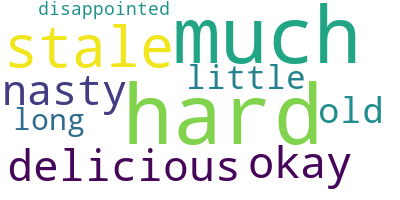

In [61]:
cloud.to_image()

In [62]:
from collections import Counter

In [63]:
indi_word = [word for sent in data_words for word in sent]
counter = Counter(indi_word)

out = []
for i, topic in topics:
    print(i)
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [64]:
df_words = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])  

In [68]:
df_plot = df_words[df_words['topic_id'] == 2] #change as required per topic

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [111]:
def plot_bars(df, xtitle, ytitle, title):
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    fig.add_trace(
    go.Bar(x=df['word'], y=df['word_count'],opacity=1, width= 0.3,name=ytitle,marker_color = 'coral'),
    secondary_y=False)

    fig.add_trace(
        go.Bar(x=df['word'], y=df['importance'],opacity=0.5,width = 0.6, name= 'Weightage',marker_color = 'coral'),
        secondary_y=True)

    # Add figure title
    fig.update_layout(
        xaxis_title = xtitle,
        title_text = title
    )
    
    return fig

In [112]:
plot_bars(df_plot,xtitle = 'Words',ytitle='Word Count',title='Word count and weights of words in Topic 2')

In [49]:
pprint.pprint(lda_model.print_topics(num_topics=100))

[(0,
  '0.133*"much_NEG" + 0.096*"green_NEG" + 0.078*"short" + 0.049*"easier" + '
  '0.043*"sour_NEG" + 0.035*"tried" + 0.025*"nutritional_NEG" + '
  '0.021*"metallic" + 0.021*"interested" + 0.018*"positive_NEG"'),
 (1,
  '0.080*"careful" + 0.074*"positive" + 0.060*"vegetable" + 0.044*"bean" + '
  '0.040*"sensitive" + 0.036*"greasy" + 0.023*"dangerous" + '
  '0.020*"unfortunate" + 0.019*"chicken" + 0.019*"good"'),
 (2,
  '0.185*"sure" + 0.130*"okay" + 0.110*"single" + 0.058*"bigger" + '
  '0.051*"sick" + 0.045*"sorry" + 0.039*"good" + 0.034*"edible_NEG" + '
  '0.026*"upset" + 0.018*"creamy_NEG"'),
 (3,
  '0.133*"many_NEG" + 0.121*"total" + 0.102*"fat" + 0.043*"fish" + '
  '0.025*"fatty" + 0.019*"k-cup_NEG" + 0.017*"excellent_NEG" + 0.015*"less" + '
  '0.014*"main_NEG" + 0.014*"usable"'),
 (4,
  '0.156*"light" + 0.091*"rich" + 0.032*"deep" + 0.030*"top_NEG" + '
  '0.030*"bold_NEG" + 0.027*"popular" + 0.021*"tolerable" + '
  '0.021*"correct_NEG" + 0.019*"good" + 0.018*"generous"'),
 (5,


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
from itertools import chain
lda_corpus = lda_model[corpus]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
data_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(data_vis)

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(threshold)

In [43]:
'''cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]
print(1)
cluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]
print(2)
cluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]
print(3)
'''

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

In [ ]:
'''print(cluster1[:100], "\n \n")
print(cluster2[:100], "\n \n")
print(cluster3[:100], "\n")
'''